Project 1: Wine Quality Prediction – **Oasis** **Infobyte**

In [ ]:
#Upload file
from google.colab import files
uploaded = files.upload()


In [ ]:
# Step 1: Load Dataset
import pandas as pd
df = pd.read_csv("/content/WineQT.csv")
print("Dataset shape:", df.shape)
df.head()



Dataset shape: (1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
# Step 2: Data info and missing values
print("Data types and null counts:")
print(df.info())
print("\nMissing values in each column:")
print(df.isnull().sum())


Data types and null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

Missing values in each column:
fixed acid

In [ ]:
# Step 3: Summary Statistics
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

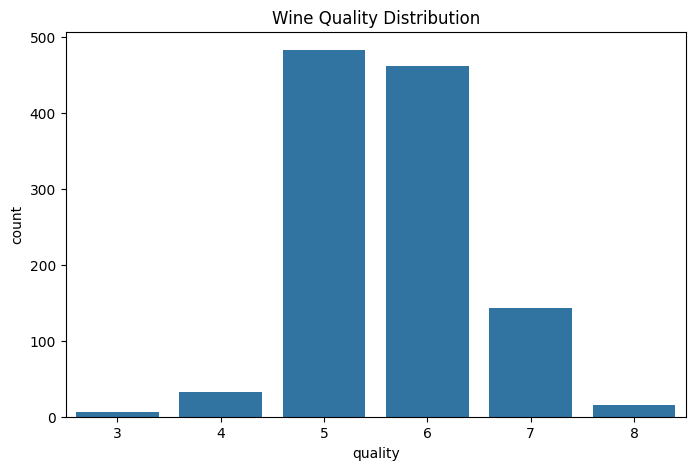

In [ ]:
# Step 4: Distribution of target variable
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.show()



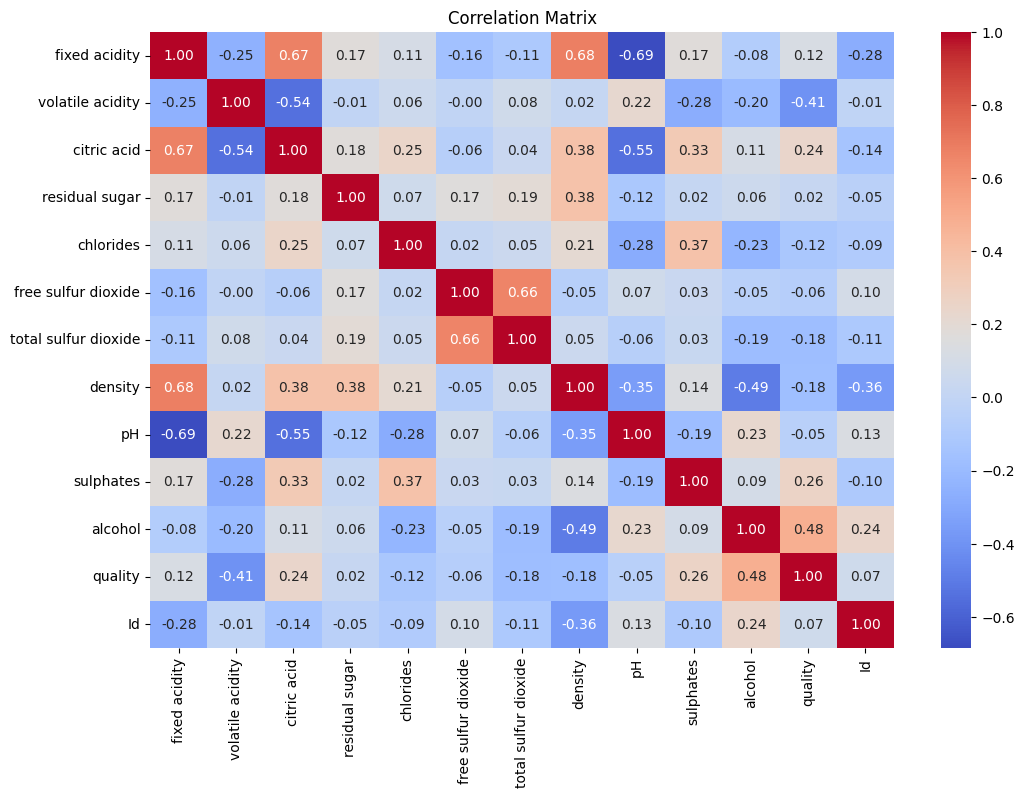

In [ ]:
# Step 5: Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



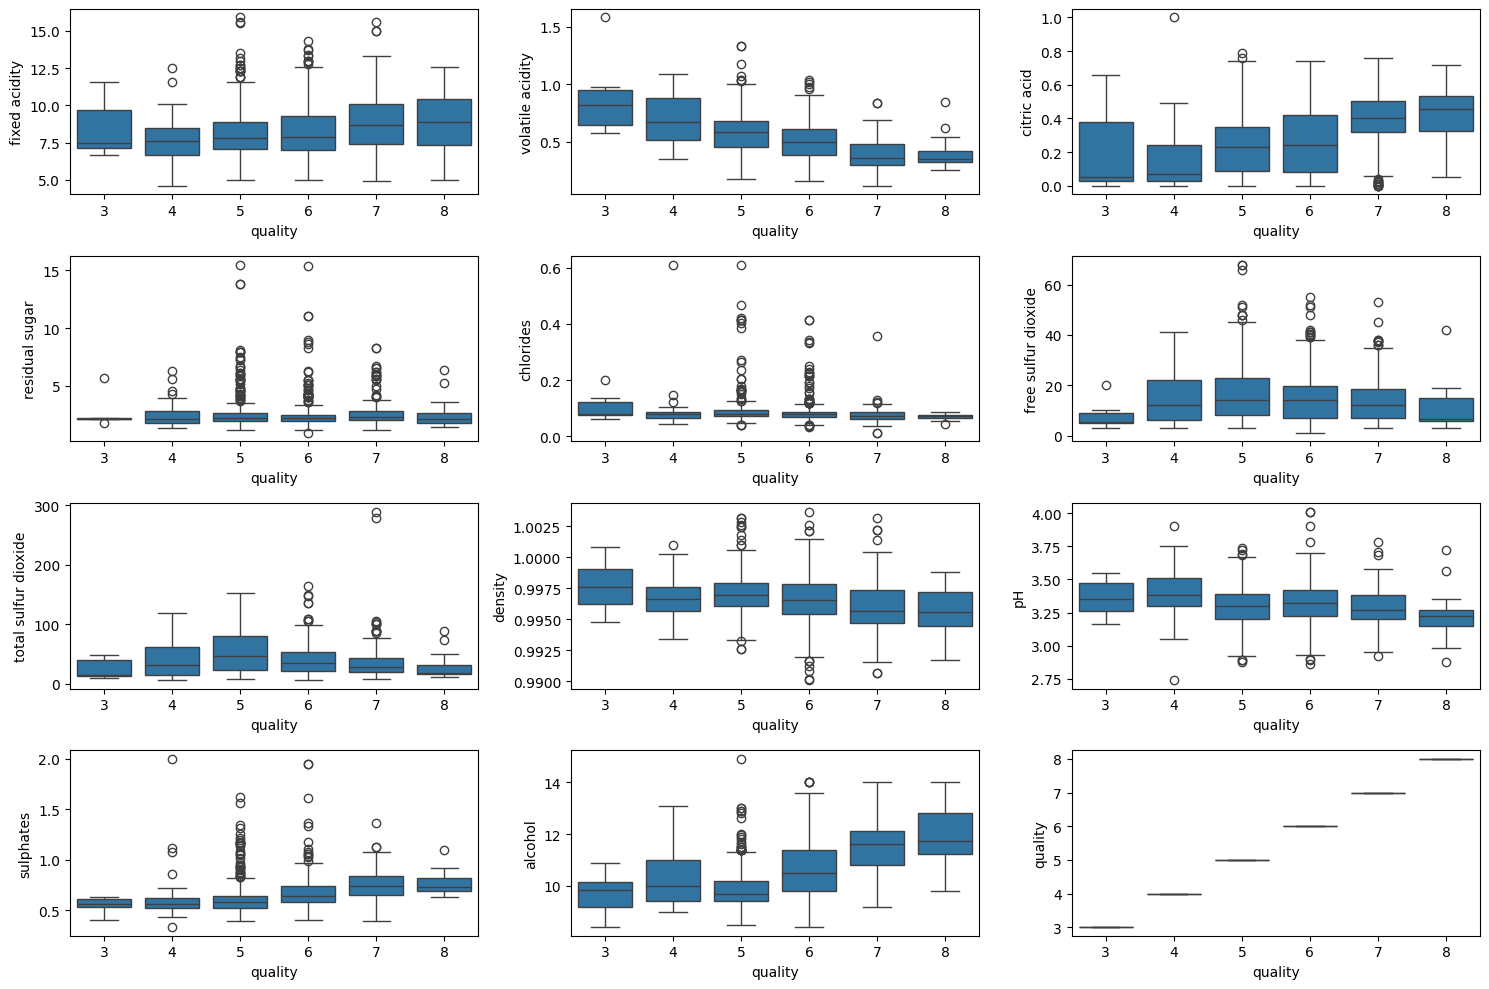

In [ ]:
# Step 6: Boxplot to visualize relation between features and quality
plt.figure(figsize=(15,10))
features = df.columns[:-1]
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    sns.boxplot(x='quality', y=feature, data=df)
    plt.tight_layout()
plt.show()


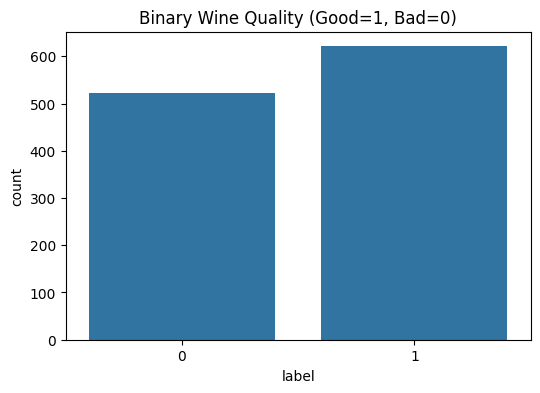

In [ ]:
# Step 7: Converting 'quality' to Binary Label (Good = 1 if quality ≥ 6)
df['label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Binary Wine Quality Distribution (Good = 1, Bad = 0)")
plt.show()


In [ ]:
# Step 8: Preparing data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(['Id', 'quality', 'label'], axis=1)
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


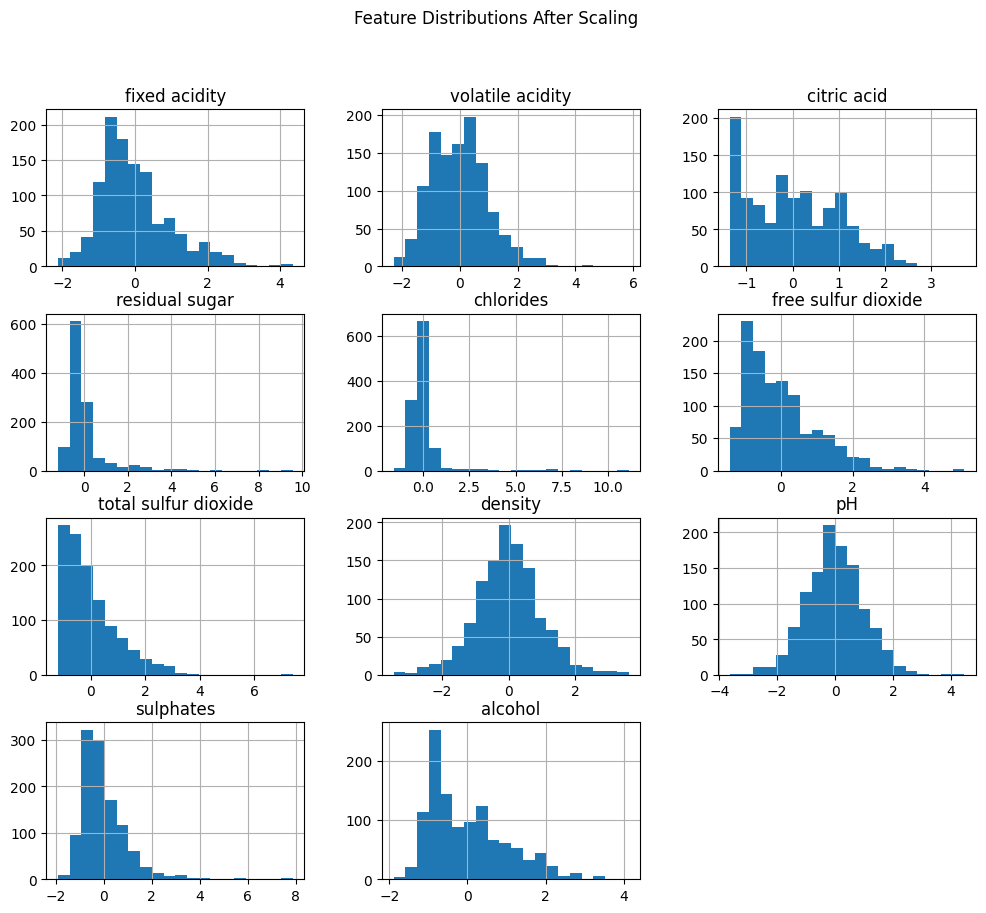

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert scaled data back to DataFrame for easier plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Feature Distributions After Scaling")
plt.show()


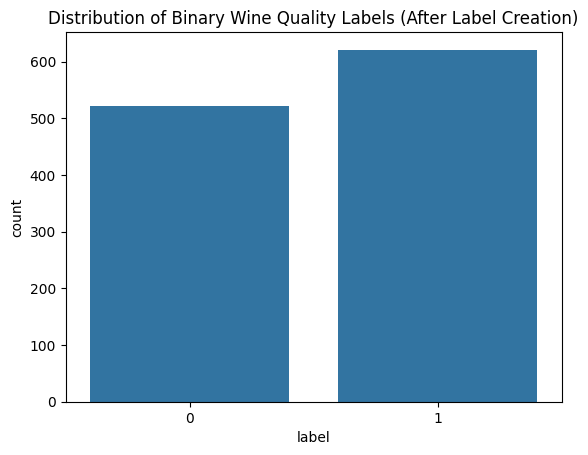

In [ ]:
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title("Distribution of Binary Wine Quality Labels (After Label Creation)")
plt.show()


In [ ]:
# Step 9: Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))


Random Forest Classifier Accuracy: 0.8165938864628821
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       105
           1       0.82      0.85      0.83       124

    accuracy                           0.82       229
   macro avg       0.82      0.81      0.81       229
weighted avg       0.82      0.82      0.82       229



In [ ]:
# Step 10: Train SGD Classifier
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

print("SGD Classifier Accuracy:", accuracy_score(y_test, sgd_pred))
print(classification_report(y_test, sgd_pred))

SGD Classifier Accuracy: 0.6855895196506551
              precision    recall  f1-score   support

           0       0.75      0.48      0.58       105
           1       0.66      0.86      0.75       124

    accuracy                           0.69       229
   macro avg       0.70      0.67      0.66       229
weighted avg       0.70      0.69      0.67       229



In [ ]:
# Step 11: Train Support Vector Classifier (SVC)
from sklearn.svm import SVC

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print("SVC Accuracy:", accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

SVC Accuracy: 0.7860262008733624
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       105
           1       0.80      0.81      0.80       124

    accuracy                           0.79       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.79      0.79      0.79       229



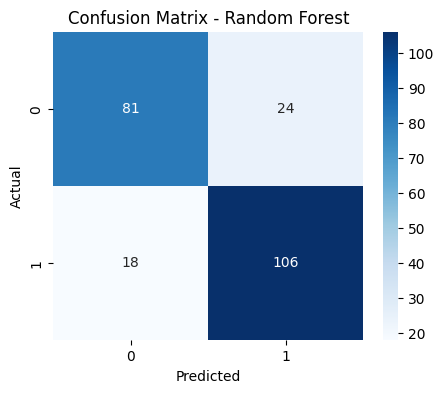

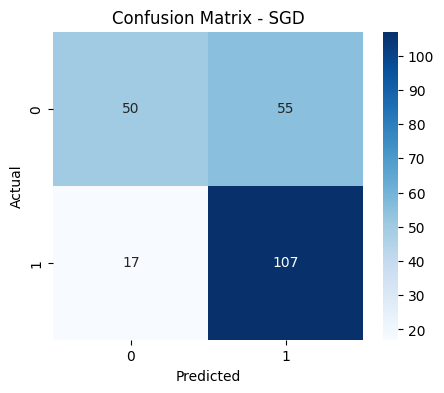

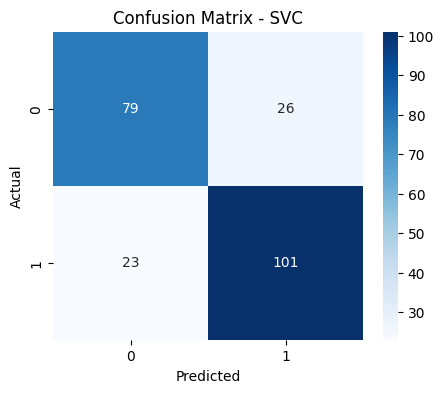

In [ ]:
# Step 12: Confusion matrices
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

models_preds = {'Random Forest': rfc_pred, 'SGD': sgd_pred, 'SVC': svc_pred}

for name, preds in models_preds.items():
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
#Step 13: Prediction on New Data
import numpy as np

input_data = (8.5, 0.28, 0.56, 1.8, 0.092, 35.0, 103.0, 0.9969, 3.30, 0.75, 10.5)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#Prediction using random forest because it has the highest accuracy
prediction = rfc.predict(input_data_reshaped)

# Output
if prediction[0] == 1:
    print("Good quality wine")
else:
    print("Bad quality wine")


Bad quality wine
